In [1]:
# Load Packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
# OS setup
main_path = os.getcwd()
data_path = os.path.join(main_path, 'data')
csv_path = os.path.join(main_path, 'info.csv') # csv 파일을 저장할 위치

if not os.path.exists(data_path):
    os.mkdir(data_path)

# store variables
%store main_path data_path csv_path

Stored 'main_path' (str)
Stored 'data_path' (str)
Stored 'csv_path' (str)


In [3]:
# Save empty csv
if not os.path.exists(csv_path):
    df = pd.DataFrame(columns=['state', 'gender', 'age', 'source', 'file', 'detail'])
    df.to_csv(csv_path)

In [4]:
# %run detail-data-trans/donateacry_corpus_data_trans.ipynb

In [5]:
# %run detail-data-trans/asvp-esd-data-trans.ipynb

In [6]:
# %run detail-data-trans/giulbia-data-trans.ipynb

In [7]:
# %run detail-data-trans/wojiaoguodekai-data-trans.ipynb

In [8]:
# %run detail-data-trans/iFLYTEK-data-trans.ipynb

/Users/jaewone/ENTER/envs/tf25/lib/python3.9/site-packages/numba/cpython/hashing.py:482: UserWarning: FNV hashing is not implemented in Numba. See PEP 456 https://www.python.org/dev/peps/pep-0456/ for rationale over not using FNV. Numba will continue to work, but hashes for built in types will be computed using siphash24. This will permit e.g. dictionaries to continue to behave as expected, however anything relying on the value of the hash opposed to hash as a derived property is likely to not work as expected.
  warnings.warn(msg)


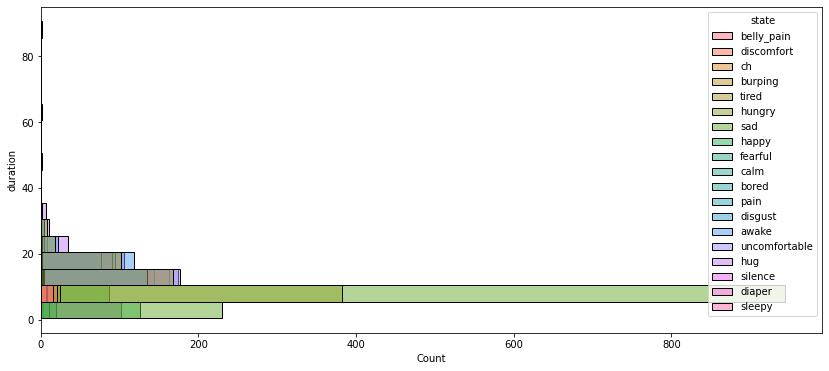

In [9]:
# Get duration of sounds
%run detail-data-trans/add_duration.ipynb

In [10]:
# Check csv
df = pd.read_csv(csv_path, index_col=0)
df.state = df.state.astype('category')
df.gender = df.gender.astype('category')
df.age = df.age.astype('category')
df.source = df.source.astype('category')

df.info()
df.tail(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688 entries, 0 to 3687
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   state     3688 non-null   category
 1   gender    1796 non-null   category
 2   age       457 non-null    category
 3   source    3688 non-null   category
 4   file      3688 non-null   object  
 5   detail    1208 non-null   object  
 6   duration  3688 non-null   float64 
dtypes: category(4), float64(1), object(2)
memory usage: 130.9+ KB


,state,gender,age,source,file,detail,duration
3685,uncomfortable,NaN,NaN,iFLYTEK,uncomfortable_109.wav,NaN,16.782222
3686,uncomfortable,NaN,NaN,iFLYTEK,uncomfortable_135.wav,NaN,13.100567
3687,uncomfortable,NaN,NaN,iFLYTEK,uncomfortable_121.wav,NaN,15.530000


In [11]:
# data Overview
print('float values')
df.describe().T

float values


,count,mean,std,min,25%,50%,75%,max
duration,3688.0,11.204448,5.290027,0.522437,7.0,10.0,14.0,86.387375


In [12]:
print('string values')
df.describe(include='O').T

string values


,count,unique,top,freq
file,3688,3688,999bf14b-e417-4b44-b746-9253f81efe38-143097400...,1
detail,1208,11,sad,1052


In [13]:
print('category values')
df.describe(include='category').T

category values


,count,unique,top,freq
state,3688,19,sad,1180
gender,1796,2,m,1615
age,457.0,5.0,26.0,162.0
source,3688,5,asvp-esd,1339


In [14]:
('string values')
df.describe(include='O')

print('category values')
df.describe(include='category')

category values


,state,gender,age,source
count,3688,1796,457.0,3688
unique,19,2,5.0,5
top,sad,m,26.0,asvp-esd
freq,1180,1615,162.0,1339


state 에 따른 파일의 개수와 비율
sad        state exists in 32.00% of  1180 files.
hungry     state exists in 18.38% of   678 files.
hug        state exists in 08.54% of   315 files.
awake      state exists in 07.59% of   280 files.
sleepy     state exists in 07.51% of   277 files.
uncomfortable state exists in 07.21% of   266 files.
diaper     state exists in 06.72% of   248 files.
happy      state exists in 05.91% of   218 files.
silence    state exists in 02.77% of   102 files.
calm       state exists in 00.81% of    30 files.
tired      state exists in 00.65% of    24 files.
discomfort state exists in 00.54% of    20 files.
belly_pain state exists in 00.43% of    16 files.
fearful    state exists in 00.27% of    10 files.
burping    state exists in 00.22% of     8 files.
ch         state exists in 00.19% of     7 files.
bored      state exists in 00.16% of     6 files.
pain       state exists in 00.05% of     2 files.
disgust    state exists in 00.03% of     1 files.


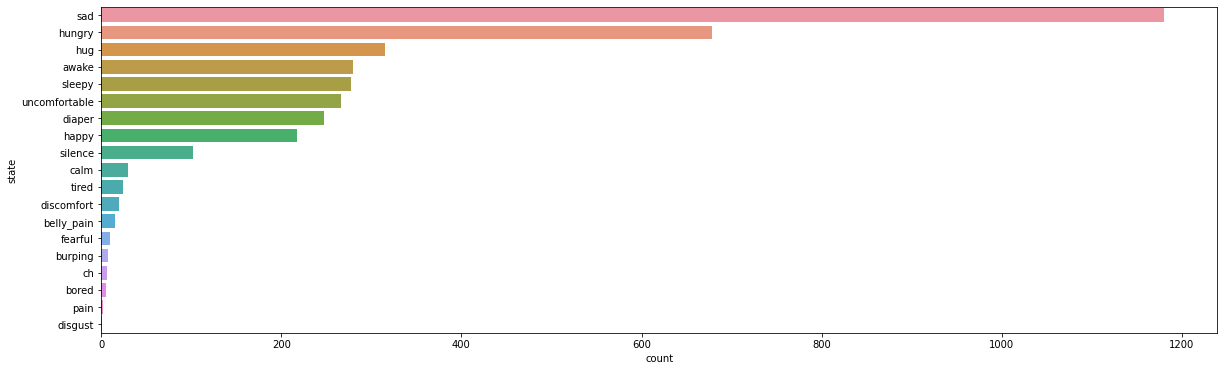

In [15]:
# 상태에 따른 파일의 개수를 알아보자.

def print_category_info(category: str, sub=None):
    print(f"{category} 에 따른 파일의 개수와 비율")
    value_counts = df[category].value_counts()
    keys = value_counts.index.tolist()
    counts = value_counts.values.tolist()
    rates = list(df[category].value_counts(normalize=True).values)

    for i in range(len(keys)):
        print(f"{keys[i]:10s} state exists in {rates[i]*100:05.2f}% of {counts[i]:5d} files.")

    fig, ax = plt.subplots(figsize=(20, 6))
    sns.countplot(y=category, 
                data=df,
                order=keys,
                hue=sub,
                dodge=False)

print_category_info('state')

source 에 따른 파일의 개수와 비율
asvp-esd   state exists in 36.31% of  1339 files.
iFLYTEK    state exists in 24.89% of   918 files.
wojiaoguodekai state exists in 23.48% of   866 files.
donate_a_cry state exists in 12.39% of   457 files.
giulbia    state exists in 02.93% of   108 files.


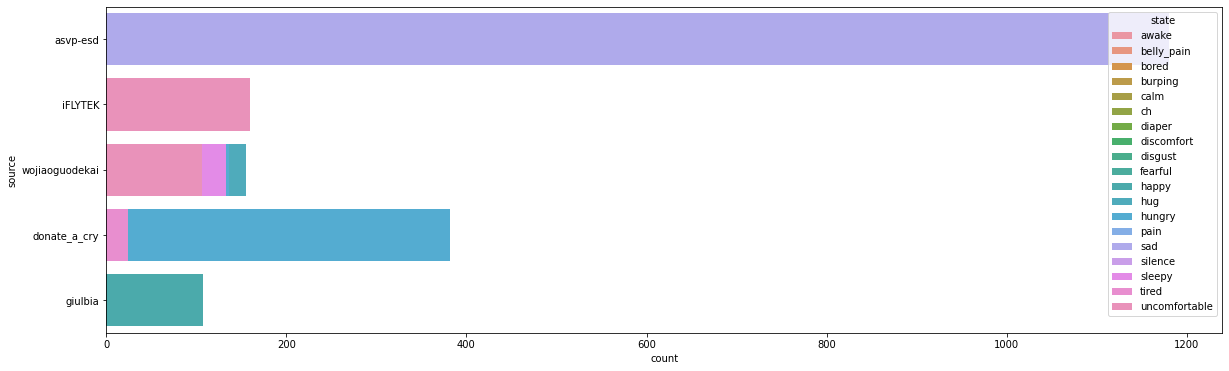

In [16]:
# 출처에 따른 파일의 개수를 알아보자.
print_category_info('source', sub='state')

NULL value counts: 1892

Female exists in 10.08% of  181 files.
Male   exists in 89.92% of 1615 files.


<Axes: xlabel='count', ylabel='gender'>

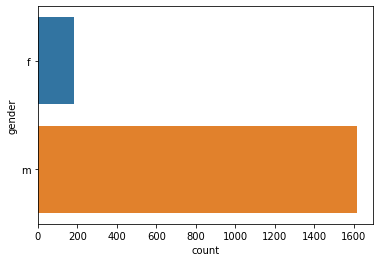

In [25]:
print(f"NULL value counts: {df.gender.isna().sum()}\n")

# 남성 자료가 많다.
gender_count = df.gender.value_counts().values
gender_rate = df.gender.value_counts(normalize=True).values
print(f"Female exists in {gender_rate[1]*100:05.2f}% of {gender_count[1]:4d} files.")
print(f"Male   exists in {gender_rate[0]*100:05.2f}% of {gender_count[0]:4d} files.")

sns.countplot(y='gender',data=df)

<Axes: xlabel='Count', ylabel='duration'>

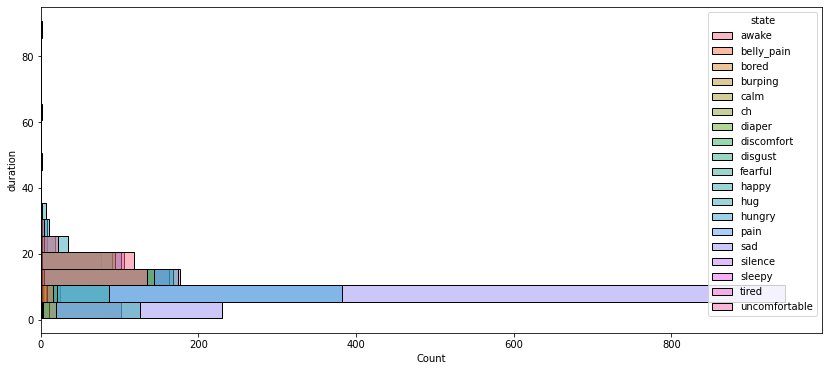

In [18]:
# 자료의 시간 비율에 대해 알아보자.

fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(y='duration',
             binwidth=5,
             data=df,
             hue='state')

<Axes: xlabel='count', ylabel='duration'>

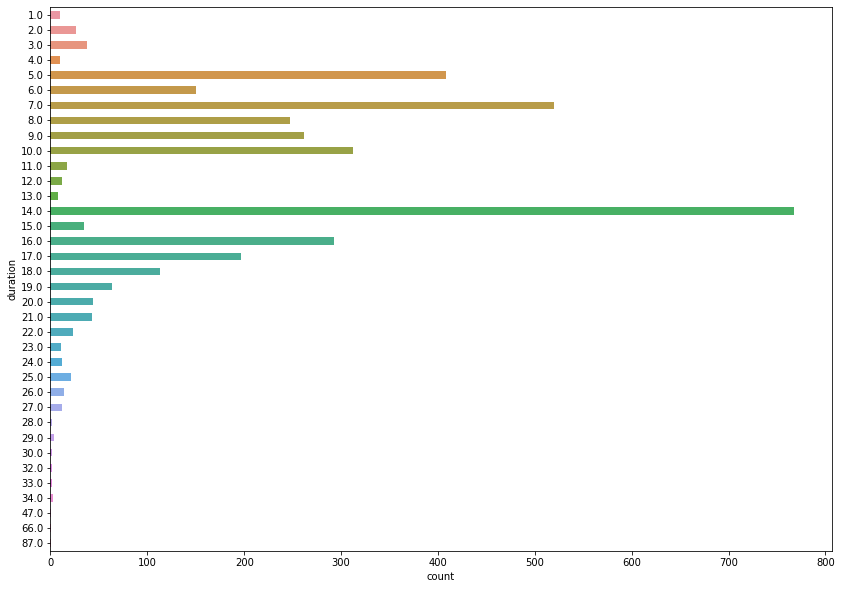

In [19]:
# 소수점 내림을 통해 더 자세히 알아보자

fig, ax = plt.subplots(figsize=(14, 10))
sns.countplot(y='duration', 
              data=pd.DataFrame(df['duration'].apply(np.ceil)),
              width=0.5)